In [ ]:
!pip install graphviz==0.10 #instala a biblioteca do python
!apt=get install graphviz #intala as linhas de comando do graphviz no linux do cloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
install: missing destination file operand after 'graphviz'
Try 'install --help' for more information.


In [ ]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)

dados.head()
#dados mostra informações sobre vendas de carros
#mileage_per_year = milhas por ano
#model_year = ano do carro
#price = preço
#sold = vendido

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_renomear = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
mapa = {
    'yes':1,
    'no':0
}
dados.vendido = dados.vendido.map(mapa)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
dados['idade_do_modelo']= 2018 - dados.ano_do_modelo
dados

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,18
1,1,7843,1998,40557.96,1,20
2,2,7109,2006,89627.50,0,12
3,3,26823,2015,95276.14,0,3
4,4,7935,2014,117384.68,1,4
...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,12
9996,9996,13246,2002,107424.63,1,16
9997,9997,13018,2014,93856.99,0,4
9998,9998,10464,2011,51250.57,1,7


In [ ]:
dados['km_por_ano']=dados.milhas_por_ano * 1.60934
dados

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,18,35085.22134
1,1,7843,1998,40557.96,1,20,12622.05362
2,2,7109,2006,89627.50,0,12,11440.79806
3,3,26823,2015,95276.14,0,3,43167.32682
4,4,7935,2014,117384.68,1,4,12770.11290
...,...,...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0,12,25060.64248
9996,9996,13246,2002,107424.63,1,16,21317.31764
9997,9997,13018,2014,93856.99,0,4,20950.38812
9998,9998,10464,2011,51250.57,1,7,16840.13376


In [ ]:
dados = dados.drop(axis='columns', columns = ['milhas_por_ano', 'ano_do_modelo','Unnamed: 0']) 

dados

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290
...,...,...,...,...
9995,97112.86,0,12,25060.64248
9996,107424.63,1,16,21317.31764
9997,93856.99,0,4,20950.38812
9998,51250.57,1,7,16840.13376


# Classificação linear

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

seed=5
np.random.seed(seed)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, stratify = y)
#O stratify = y escolhe os dados de forma proporcional
#Ex: Se em y tenho 70% de zeros e 30% de ums, será pega uma amostra para teste com 70% de zeros e 30% de ums


print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsao = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsao)*100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 58.00%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


#Dummy
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [ ]:
#Dummy = bobo
#Um DummyClassifier é um estimador (estima se é bom ou ruim) do meu algoritmo, implementado no sklearn
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
#A estrategia = 'stratified' preve com base na proporção, ou seja, se há 70% de zeros e 30% de ums,
#a previsão sempre será 70% de zeros e 30% de ums
#Lembra do stratified em train_test_split

dummy_stratified.fit(treino_x,treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y)*100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

#BIZU: para calcular a acuracia do meu algoritmo dummy não preciso sempre usar os metodos predict e accuracy_score
#basta usar o metodo score() com meu dummy:
# previsao = dummy_stratified.predict(teste_x)

# acuracia = accuracy_score(teste_y, previsao)*100
# print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 52.44%


In [ ]:
#Dummy = bobo
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
#A estrategia = 'most_frequent'faz o metodo predict retornar para todos os testes o valor mais frequente em y
#Lembrar da tecnica que fiz com np.ones no notebook anterior bara achar o baseline

dummy_mostfrequent.fit(treino_x,treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) *100
print("A acurácia do dummy most_frequent foi %.2f%%" % acuracia)

#BIZU: para calcular a acuracia do meu algoritmo dummy não preciso sempre usar os metodos predict e accuracy_score
#basta usar o metodo score() com meu dummy:
# previsao = dummy_mostfrequent.predict(teste_x)

# acuracia = accuracy_score(teste_y, previsao)*100
# print("A acurácia do dummy most_frequent foi %.2f%%" % acuracia)

A acurácia do dummy most_frequent foi 58.00%


In [ ]:
#Vou escolher o dummy most_frequent como meu algortmo de baseline pois ele tem o maior valor

# Classificação não linear

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = dados[['preco','idade_do_modelo','km_por_ano']]
y = dados['vendido']

seed=5
np.random.seed(seed)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y) 

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))

#Arrumo a escala dos dados
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsao = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsao)*100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


# Arvore de decisão

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = dados[['preco','idade_do_modelo','km_por_ano']]
y = dados['vendido']

seed=5
np.random.seed(seed)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y) 

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))


#Arvores de decisão não precisão de escaladores para funcionar bem
# scaler = StandardScaler()
# scaler.fit(raw_treino_x)
# treino_x = scaler.transform(raw_treino_x)
# teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=3) #Estancio o DecisionTreeClassifier e defino a profundidade da arvore para 3
modelo.fit(raw_treino_x, treino_y)
previsao = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsao)*100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


In [ ]:
#Exportando a arvore e as decisoes...
from sklearn.tree import export_graphviz

#export_graphviz retorna o formato de um grafico apenas sem visualização visual
dot_data = export_graphviz(
                            modelo, 
                            out_file=None, #exporto para lugar nenhum
                            feature_names = x.columns, #Coloco os rotulos da coluna na arvore
                            filled = True, #coloco cores para cada tipo de classificação
                            rounded= True, #Arrendonda os valores no grafico
                            class_names = ['não','sim'] #Defino os rotulos das decisões
                          )
#dot_data

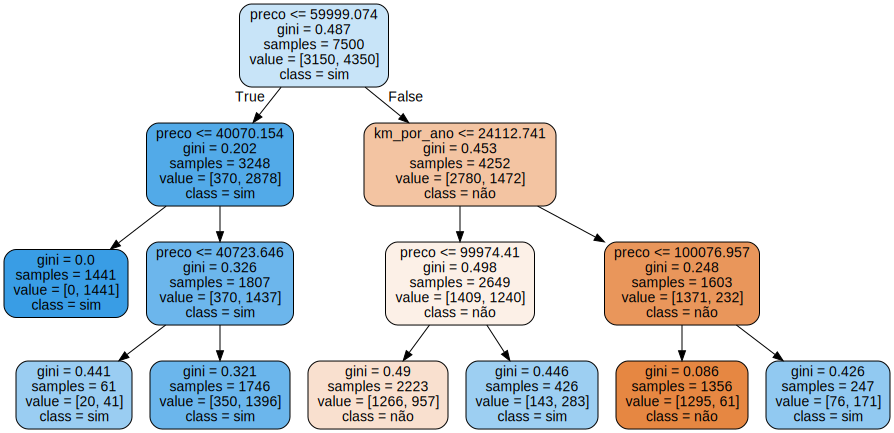

In [ ]:
#Como fazer a visualização gráfica da árvore?

import graphviz
grafico = graphviz.Source(dot_data)
grafico


##Interpretando a arvore acima

* Acima **azul** representa **sim**
* Acima **vermelho** representa **não**
* Cores claras representam pouca certeza da decisão já escuras muita certeza
* **samples** indica quantas amostras de treino entraram naquela condição
* **class** indica a classe (rótulo) que uma amostra está no momento
* **gini** facilita a otimização
* Nos vertices da árvore são tomadas as decisões



